You are given a dataset of fake and clean currency notes. The problem is to find if the given currency note is fake or clean. Prepare the data and create models using all the decision tree techniques such as CART, C4.5 and ID3 and find the best of all your models. Use python to create the model and cross-validate the dataset. Please make sure you also use appropriate performance measures, error values, bias and variance to come to conclusion of the best dataset.

**Load Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.metrics import classification_report

**Read CSV file into a DataFrame**

In [2]:
data = pd.read_csv("../input/bank note aunthetication.csv",
                   names = ['variance', 'skewness', 'curtosis', 'entropy', 'output'])

**Display the first five rows of the dataset**

In [3]:
data.head()

,variance,skewness,curtosis,entropy,output
0,3.62160,,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.4621,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.5944,0
4,0.32924,-4.4552,4.5718,-0.9888,0


**Summary of the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null object
curtosis    1372 non-null object
entropy     1372 non-null object
output      1372 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB


**Convert the DatFrame objects into a integer/float**

In [5]:
features = ['variance', 'skewness', 'curtosis', 'entropy']

for feature in features:
    data[feature] = pd.to_numeric(data[feature], errors='coerce')
    
# print the data summary again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1358 non-null float64
curtosis    1351 non-null float64
entropy     1368 non-null float64
output      1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Detect any missing values in the data**

In [6]:
data.isnull().sum()

variance     0
skewness    14
curtosis    21
entropy      4
output       0
dtype: int64

**Replace missing values with a mean of columns/features**

In [7]:
for feature in features:
    data[feature] = data[feature].fillna(data[feature].mean())

# check if there are still any missing values
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
output      0
dtype: int64

**Plot pairwise relationships in a dataset**

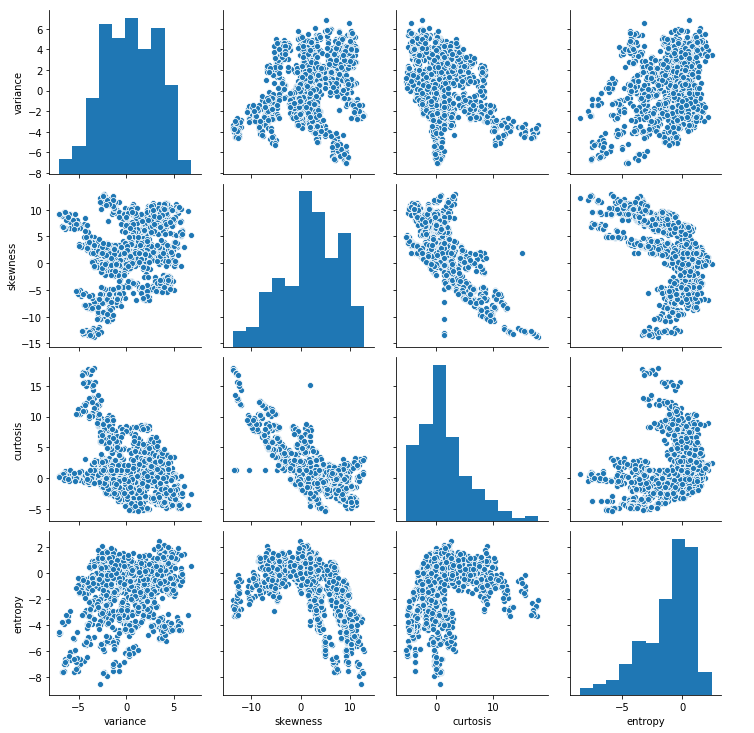

In [8]:
sns.pairplot(data[features])

**Output class counts**

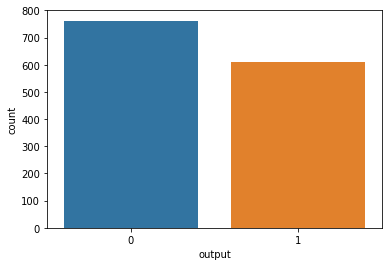

In [9]:
sns.countplot(data['output'])

**Define input features and output class**

In [10]:
X = data[features]
y = data['output']

**Learning Curve**

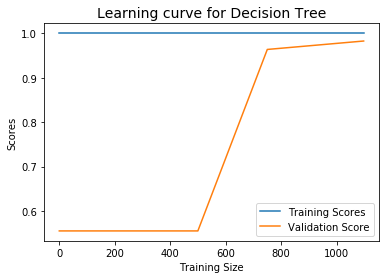

In [11]:
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(), X, y,
                                                         train_sizes=[1, 250, 500, 750, 1097],
                                                         cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Scores')
plt.plot(train_sizes, valid_scores_mean, label='Validation Score')
plt.xlabel('Training Size', fontsize=10)
plt.ylabel('Scores', fontsize=10)
plt.title('Learning curve for Decision Tree', fontsize=14)
plt.legend()
plt.show()

**We can see clearly that the training score is still around the maximum and the validation score could be increased with more training samples.**

**Evaluating Decision tree classifier on performance measure 'Gini' and 'Entropy'**

In [12]:
measures = ['gini', 'entropy']

for measure in measures:
    clf = DecisionTreeClassifier(criterion=measure)
    scores = cross_val_score(clf, X, y, cv=5)
    print("Accuracy for criterion=%s : %0.2f (+- %0.2f)" % (measure, scores.mean(), scores.std() * 2))


Accuracy for criterion=gini : 0.98 (+- 0.01)
Accuracy for criterion=entropy : 0.99 (+- 0.01)


**Evaluating Decision tree classifier on set of different numbers of depth of the tree**

In [13]:
tree_depth = [1, 2, 3, 4, 5, 6, 7]

for depth in tree_depth:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X, y, cv=5)
    print("Accuracy for max_depth=%d : %0.2f (+- %0.2f)" % (depth, scores.mean(), scores.std() * 2))

Accuracy for max_depth=1 : 0.85 (+- 0.04)
Accuracy for max_depth=2 : 0.91 (+- 0.01)
Accuracy for max_depth=3 : 0.94 (+- 0.03)
Accuracy for max_depth=4 : 0.95 (+- 0.03)
Accuracy for max_depth=5 : 0.97 (+- 0.02)
Accuracy for max_depth=6 : 0.98 (+- 0.02)
Accuracy for max_depth=7 : 0.98 (+- 0.02)


**Ploting Decision tree using Graphviz**

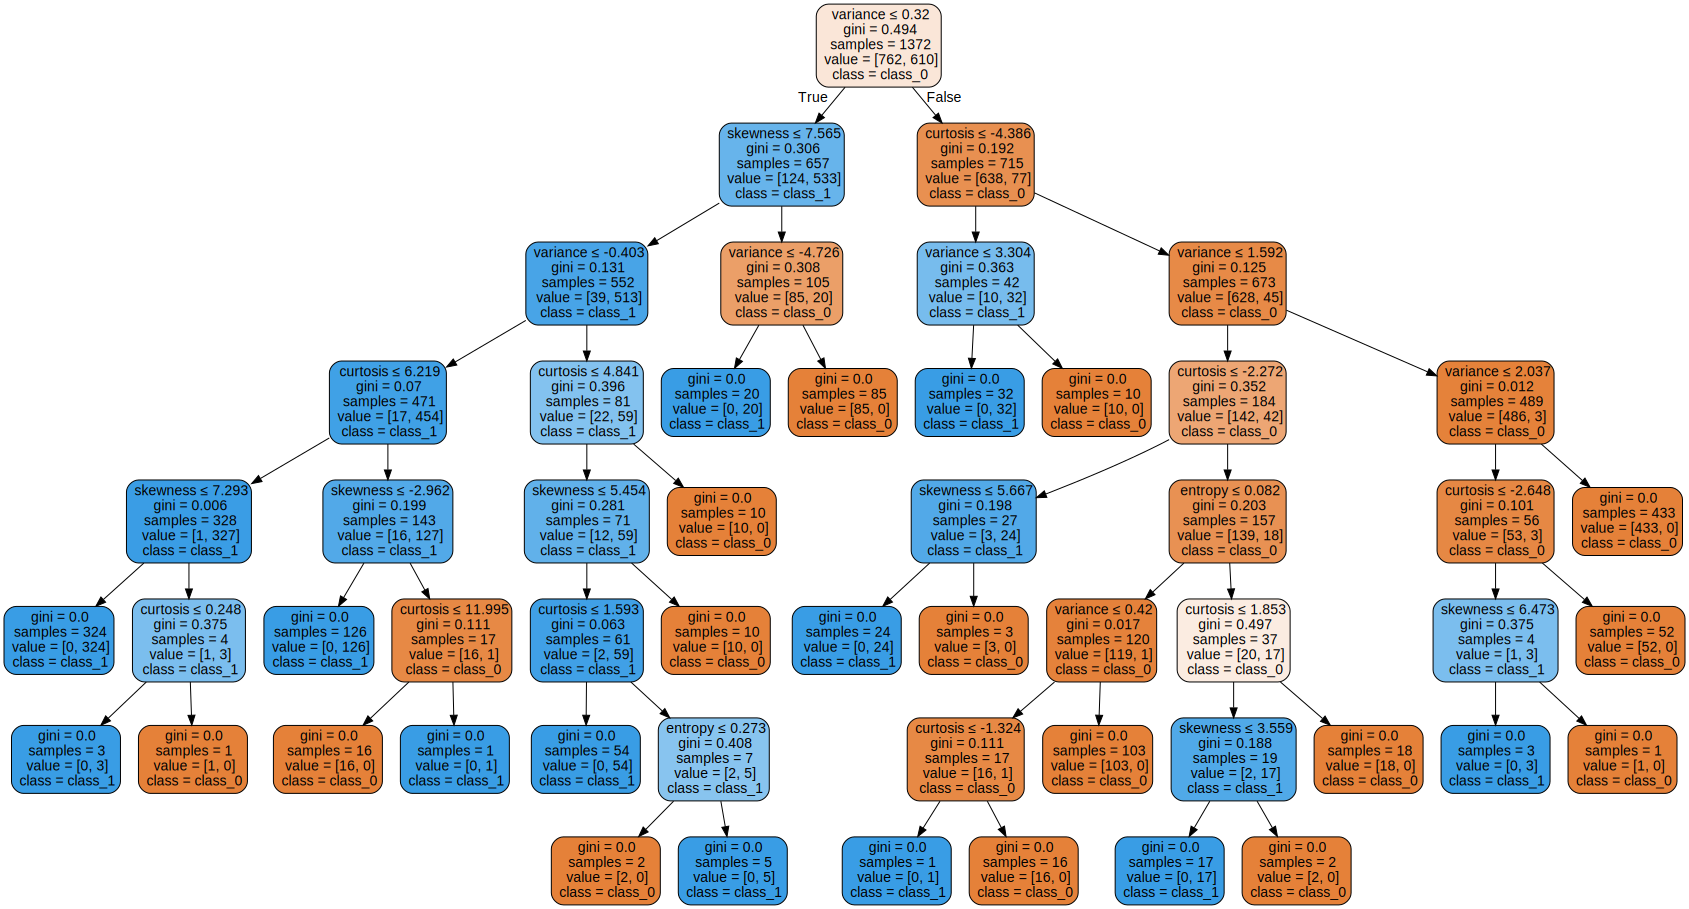

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf.fit(X,y), 
                       out_file=None, 
                       feature_names=features,  
                       class_names=['class_0', 'class_1'],  
                       filled=True, rounded=True,  
                       special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [15]:
$ jupyter nbconvert  Bank_Note_Aunthetication.ipynb --to html --output output.html

SyntaxError: invalid syntax (<ipython-input-15-336c932839af>, line 1)